In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
claims = pd.read_csv('Medicare_Part_D_Spending_by_Drug_2022.csv')

In [23]:
claims.head()

,Brnd_Name,Gnrc_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2018,Tot_Dsg_Unts_2018,Tot_Clms_2018,Tot_Benes_2018,Avg_Spnd_Per_Dsg_Unt_Wghtd_2018,Avg_Spnd_Per_Clm_2018,...,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Tot_Benes_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Avg_Spnd_Per_Bene_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22,CAGR_Avg_Spnd_Per_Dsg_Unt_18_22
0,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Overall,"$167,193.78","761,658","6,538","2,341",$0.22,$25.57,...,"$70,039.61","310,304","2,501","1,147",$0.23,$28.00,$61.06,0.0,0.01%,0.01%
1,1st Tier Unifine Pentips,"Pen Needle, Diabetic",1,Owen Mumford Us,"$167,193.78","761,658","6,538","2,341",$0.22,$25.57,...,"$70,039.61","310,304","2,501","1,147",$0.23,$28.00,$61.06,0.0,0.01%,0.01%
2,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Overall,"$369,402.85","1,813,908","14,931","5,674",$0.20,$24.74,...,"$114,601.54","486,206","3,846","1,474",$0.24,$29.80,$77.75,0.0,0.01%,0.04%
3,1st Tier Unifine Pentips Plus,"Pen Needle, Diabetic",1,Owen Mumford Us,"$369,402.85","1,813,908","14,931","5,674",$0.20,$24.74,...,"$114,601.54","486,206","3,846","1,474",$0.24,$29.80,$77.75,0.0,0.01%,0.04%
4,Abacavir,Abacavir Sulfate,6,Overall,"$10,653,423.32","3,034,767","40,388","7,359",$4.03,$263.78,...,"$6,945,563.71","2,035,106","24,317","3,452",$3.87,$285.63,"$2,012.04",0.0,0.21%,-0.01%


In [24]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13889 entries, 0 to 13888
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        13889 non-null  object 
 1   Gnrc_Name                        13889 non-null  object 
 2   Tot_Mftr                         13889 non-null  int64  
 3   Mftr_Name                        13889 non-null  object 
 4   Tot_Spndng_2018                  9647 non-null   object 
 5   Tot_Dsg_Unts_2018                9647 non-null   object 
 6   Tot_Clms_2018                    9647 non-null   object 
 7   Tot_Benes_2018                   9573 non-null   object 
 8   Avg_Spnd_Per_Dsg_Unt_Wghtd_2018  9647 non-null   object 
 9   Avg_Spnd_Per_Clm_2018            9647 non-null   object 
 10  Avg_Spnd_Per_Bene_2018           9478 non-null   object 
 11  Outlier_Flag_2018                9645 non-null   float64
 12  Tot_Spndng_2019   

In [25]:
claims.isnull().sum()

Brnd_Name                             0
Gnrc_Name                             0
Tot_Mftr                              0
Mftr_Name                             0
Tot_Spndng_2018                    4242
Tot_Dsg_Unts_2018                  4242
Tot_Clms_2018                      4242
Tot_Benes_2018                     4316
Avg_Spnd_Per_Dsg_Unt_Wghtd_2018    4242
Avg_Spnd_Per_Clm_2018              4242
Avg_Spnd_Per_Bene_2018             4411
Outlier_Flag_2018                  4244
Tot_Spndng_2019                    3183
Tot_Dsg_Unts_2019                  3183
Tot_Clms_2019                      3183
Tot_Benes_2019                     3356
Avg_Spnd_Per_Dsg_Unt_Wghtd_2019    3183
Avg_Spnd_Per_Clm_2019              3183
Avg_Spnd_Per_Bene_2019             3412
Outlier_Flag_2019                  3186
Tot_Spndng_2020                    2174
Tot_Dsg_Unts_2020                  2174
Tot_Clms_2020                      2174
Tot_Benes_2020                     2424
Avg_Spnd_Per_Dsg_Unt_Wghtd_2020    2174


In [26]:
cols_to_keep = ["Brnd_Name", "Tot_Mftr", "Mftr_Name", "Tot_Spndng_2021", "Tot_Dsg_Unts_2021", "Tot_Clms_2021", "Tot_Benes_2021", "Avg_Spnd_Per_Dsg_Unt_Wghtd_2021", "Avg_Spnd_Per_Clm_2021", "Avg_Spnd_Per_Bene_2021", "Outlier_Flag_2021", "Tot_Spndng_2022", "Tot_Dsg_Unts_2022", "Tot_Clms_2022", "Tot_Benes_2022", "Avg_Spnd_Per_Dsg_Unt_Wghtd_2022", "Avg_Spnd_Per_Clm_2022", "Avg_Spnd_Per_Bene_2022", "Outlier_Flag_2022", "Chg_Avg_Spnd_Per_Dsg_Unt_21_22"]

updated_claims = claims[cols_to_keep]

In [27]:
updated_claims.head()

,Brnd_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Tot_Benes_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Avg_Spnd_Per_Bene_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22
0,1st Tier Unifine Pentips,1,Overall,"$102,280.76","459,384","3,708","1,313",$0.22,$27.58,$77.90,0.0,"$70,039.61","310,304","2,501","1,147",$0.23,$28.00,$61.06,0.0,0.01%
1,1st Tier Unifine Pentips,1,Owen Mumford Us,"$102,280.76","459,384","3,708","1,313",$0.22,$27.58,$77.90,0.0,"$70,039.61","310,304","2,501","1,147",$0.23,$28.00,$61.06,0.0,0.01%
2,1st Tier Unifine Pentips Plus,1,Overall,"$131,927.33","566,872","4,564","1,766",$0.23,$28.91,$74.70,0.0,"$114,601.54","486,206","3,846","1,474",$0.24,$29.80,$77.75,0.0,0.01%
3,1st Tier Unifine Pentips Plus,1,Owen Mumford Us,"$131,927.33","566,872","4,564","1,766",$0.23,$28.91,$74.70,0.0,"$114,601.54","486,206","3,846","1,474",$0.24,$29.80,$77.75,0.0,0.01%
4,Abacavir,6,Overall,"$7,036,063.99","2,500,817","30,527","4,254",$3.19,$230.49,"$1,653.99",0.0,"$6,945,563.71","2,035,106","24,317","3,452",$3.87,$285.63,"$2,012.04",0.0,0.21%


In [28]:
updated_claims.isnull().sum()

Brnd_Name                             0
Tot_Mftr                              0
Mftr_Name                             0
Tot_Spndng_2021                    1165
Tot_Dsg_Unts_2021                  1165
Tot_Clms_2021                      1165
Tot_Benes_2021                     1566
Avg_Spnd_Per_Dsg_Unt_Wghtd_2021    1165
Avg_Spnd_Per_Clm_2021              1165
Avg_Spnd_Per_Bene_2021             1570
Outlier_Flag_2021                  1171
Tot_Spndng_2022                       0
Tot_Dsg_Unts_2022                     0
Tot_Clms_2022                         0
Tot_Benes_2022                      700
Avg_Spnd_Per_Dsg_Unt_Wghtd_2022       0
Avg_Spnd_Per_Clm_2022                 0
Avg_Spnd_Per_Bene_2022              700
Outlier_Flag_2022                    13
Chg_Avg_Spnd_Per_Dsg_Unt_21_22     1165
dtype: int64

In [29]:
updated_claims_cop = updated_claims.copy()

In [30]:
clean_cop = updated_claims_cop.dropna()

In [31]:
clean_cop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12138 entries, 0 to 13887
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        12138 non-null  object 
 1   Tot_Mftr                         12138 non-null  int64  
 2   Mftr_Name                        12138 non-null  object 
 3   Tot_Spndng_2021                  12138 non-null  object 
 4   Tot_Dsg_Unts_2021                12138 non-null  object 
 5   Tot_Clms_2021                    12138 non-null  object 
 6   Tot_Benes_2021                   12138 non-null  object 
 7   Avg_Spnd_Per_Dsg_Unt_Wghtd_2021  12138 non-null  object 
 8   Avg_Spnd_Per_Clm_2021            12138 non-null  object 
 9   Avg_Spnd_Per_Bene_2021           12138 non-null  object 
 10  Outlier_Flag_2021                12138 non-null  float64
 11  Tot_Spndng_2022                  12138 non-null  object 
 12  Tot_Dsg_Unts_2022      

In [32]:
clean_cop.describe(include='all')

,Brnd_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Tot_Benes_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Avg_Spnd_Per_Bene_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22
count,12138,12138.000000,12138,12138,12138,12138,12138,12138,12138,12138,12138.000000,12138,12138,12138,12138,12138,12138,12138,12138.000000,12138
unique,3122,NaN,835,9954,9764,7397,6271,2939,8304,9309,NaN,10013,9791,7302,6170,2969,8352,9296,NaN,286
top,Insulin Syringe,NaN,Overall,"$102,280.76",60,59,11,$0.22,$27.59,$47.95,NaN,"$70,039.61","1,900",51,13,$0.18,$10.33,$23.93,NaN,0.01%
freq,48,NaN,3227,2,7,25,50,107,6,5,NaN,2,6,25,60,102,7,5,NaN,797
mean,NaN,1.549514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.066980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.079090,NaN
std,NaN,2.482745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.249997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269891,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
50%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN


In [33]:
numeric_cols = ["Tot_Spndng_2021", "Tot_Dsg_Unts_2021", "Tot_Clms_2021", "Tot_Benes_2021", 
                "Avg_Spnd_Per_Dsg_Unt_Wghtd_2021", "Avg_Spnd_Per_Clm_2021", "Avg_Spnd_Per_Bene_2021", 
                "Tot_Spndng_2022", "Tot_Dsg_Unts_2022", "Tot_Clms_2022", "Tot_Benes_2022", 
                "Avg_Spnd_Per_Dsg_Unt_Wghtd_2022", "Avg_Spnd_Per_Clm_2022", "Avg_Spnd_Per_Bene_2022", 
                "Chg_Avg_Spnd_Per_Dsg_Unt_21_22"]

# Using .loc and replacing symbols in a chain to prevent SettingWithCopyWarning
for col in numeric_cols:
    clean_cop.loc[:, col] = clean_cop[col].astype(str).str.replace("$", "", regex=False).str.replace(",", "", regex=False).str.replace("%", "", regex=False)
    # Convert back to numeric after removing special characters
    clean_cop.loc[:, col] = pd.to_numeric(clean_cop[col], errors='coerce')

# Confirm changes
clean_cop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12138 entries, 0 to 13887
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Brnd_Name                        12138 non-null  object 
 1   Tot_Mftr                         12138 non-null  int64  
 2   Mftr_Name                        12138 non-null  object 
 3   Tot_Spndng_2021                  12138 non-null  object 
 4   Tot_Dsg_Unts_2021                12138 non-null  object 
 5   Tot_Clms_2021                    12138 non-null  object 
 6   Tot_Benes_2021                   12138 non-null  object 
 7   Avg_Spnd_Per_Dsg_Unt_Wghtd_2021  12138 non-null  object 
 8   Avg_Spnd_Per_Clm_2021            12138 non-null  object 
 9   Avg_Spnd_Per_Bene_2021           12138 non-null  object 
 10  Outlier_Flag_2021                12138 non-null  float64
 11  Tot_Spndng_2022                  12138 non-null  object 
 12  Tot_Dsg_Unts_2022      

In [34]:
clean_cop.head()

,Brnd_Name,Tot_Mftr,Mftr_Name,Tot_Spndng_2021,Tot_Dsg_Unts_2021,Tot_Clms_2021,Tot_Benes_2021,Avg_Spnd_Per_Dsg_Unt_Wghtd_2021,Avg_Spnd_Per_Clm_2021,Avg_Spnd_Per_Bene_2021,Outlier_Flag_2021,Tot_Spndng_2022,Tot_Dsg_Unts_2022,Tot_Clms_2022,Tot_Benes_2022,Avg_Spnd_Per_Dsg_Unt_Wghtd_2022,Avg_Spnd_Per_Clm_2022,Avg_Spnd_Per_Bene_2022,Outlier_Flag_2022,Chg_Avg_Spnd_Per_Dsg_Unt_21_22
0,1st Tier Unifine Pentips,1,Overall,102280.76,459384,3708,1313,0.22,27.58,77.9,0.0,70039.61,310304,2501,1147,0.23,28.0,61.06,0.0,0.01
1,1st Tier Unifine Pentips,1,Owen Mumford Us,102280.76,459384,3708,1313,0.22,27.58,77.9,0.0,70039.61,310304,2501,1147,0.23,28.0,61.06,0.0,0.01
2,1st Tier Unifine Pentips Plus,1,Overall,131927.33,566872,4564,1766,0.23,28.91,74.7,0.0,114601.54,486206,3846,1474,0.24,29.8,77.75,0.0,0.01
3,1st Tier Unifine Pentips Plus,1,Owen Mumford Us,131927.33,566872,4564,1766,0.23,28.91,74.7,0.0,114601.54,486206,3846,1474,0.24,29.8,77.75,0.0,0.01
4,Abacavir,6,Overall,7036063.99,2500817,30527,4254,3.19,230.49,1653.99,0.0,6945563.71,2035106,24317,3452,3.87,285.63,2012.04,0.0,0.21


In [35]:
clean_cop.describe()

,Tot_Mftr,Outlier_Flag_2021,Outlier_Flag_2022
count,12138.000000,12138.000000,12138.000000
mean,1.549514,0.066980,0.079090
std,2.482745,0.249997,0.269891
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000
max,41.000000,1.000000,1.000000


<Axes: xlabel='Outlier_Flag_2021'>

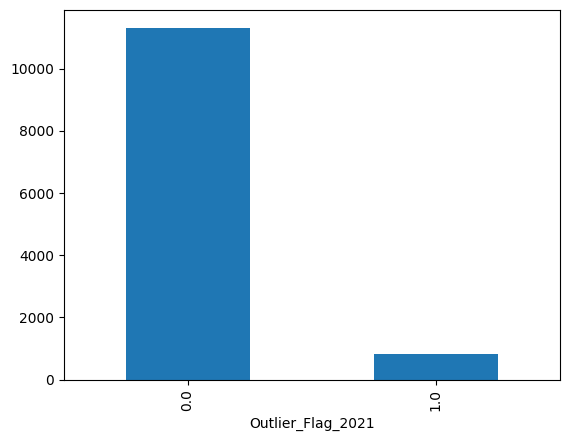

In [36]:
outlier_count_2021 = clean_cop["Outlier_Flag_2021"].value_counts()
outlier_count_2022 = clean_cop["Outlier_Flag_2022"].value_counts()
outlier_count_2021.plot(kind='bar')


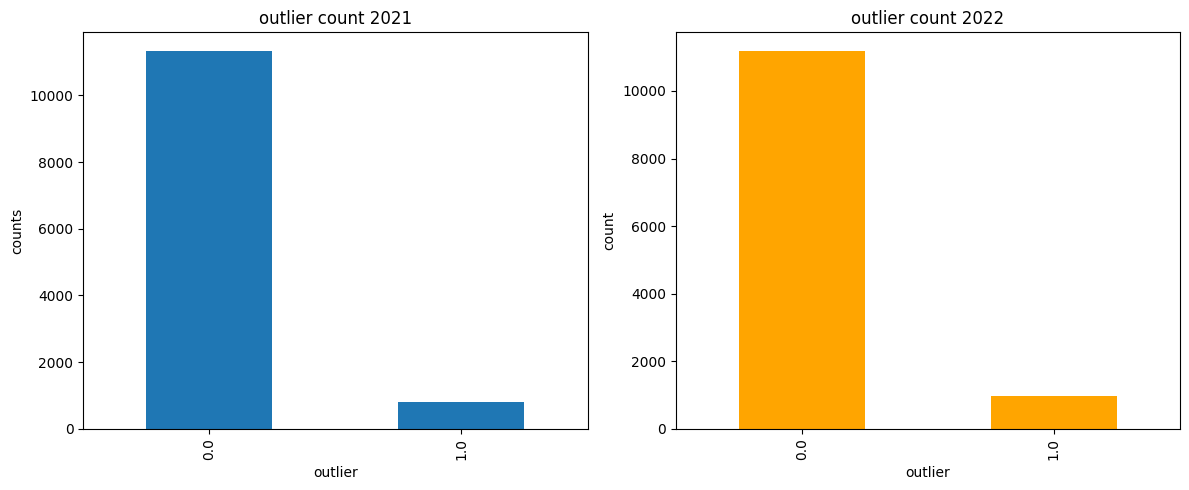

In [37]:
plt.figure(figsize=(12, 5))  # Set the figure size to make the plots clear

# First bar chart
plt.subplot(1, 2, 1)  # (rows, columns, plot number)
outlier_count_2021.plot(kind='bar')
plt.title('outlier count 2021')
plt.xlabel('outlier')
plt.ylabel('counts')

# Second bar chart
plt.subplot(1, 2, 2)
outlier_count_2022.plot(kind='bar', color='orange')  # Set a different color if desired
plt.title('outlier count 2022')
plt.xlabel('outlier')
plt.ylabel('count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [38]:
claim_2021_cols = ["Brnd_Name", "Tot_Mftr", "Mftr_Name", "Tot_Spndng_2021", "Tot_Dsg_Unts_2021", "Tot_Clms_2021", "Tot_Benes_2021", "Avg_Spnd_Per_Dsg_Unt_Wghtd_2021", "Avg_Spnd_Per_Clm_2021", "Avg_Spnd_Per_Bene_2021", "Outlier_Flag_2021"]

claim_2022_cols = ["Brnd_Name", "Tot_Mftr", "Mftr_Name", "Tot_Spndng_2022", "Tot_Dsg_Unts_2022", "Tot_Clms_2022", "Tot_Benes_2022", "Avg_Spnd_Per_Dsg_Unt_Wghtd_2022", "Avg_Spnd_Per_Clm_2022", "Avg_Spnd_Per_Bene_2022", "Outlier_Flag_2022"]

claims_2021 = clean_cop[claim_2021_cols]
claims_2022 = clean_cop[claim_2022_cols]

In [39]:
display(claims_2021.describe())
print("\n")
print("\n")
display(claims_2022.describe())

,Tot_Mftr,Outlier_Flag_2021
count,12138.000000,12138.000000
mean,1.549514,0.066980
std,2.482745,0.249997
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,41.000000,1.000000


,Tot_Mftr,Outlier_Flag_2022
count,12138.000000,12138.000000
mean,1.549514,0.079090
std,2.482745,0.269891
min,1.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,41.000000,1.000000
